# Reinforcement Learning - **Recycling robot example** 

(from Sutton, page 42)

References:
  - Gym documentation: https://gym.openai.com/

  

In [2]:
pip install gym

     |████████████████████████████████| 1.6 MB 5.8 MB/s eta 0:00:01     |███████████████▏                | 747 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.1 MB/s eta 0:00:01     |█████████████▊                  | 440 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 12.9 MB/s eta 0:00:01    |██▍                             | 61 kB 14.6 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656449 sha256=af11353c24fbef51310a9a67359a96824025b3dc2a66ba8062e9e9ea00ddf0a1
  Stored in directory: /Users/gladys/Library/Caches/pip/wheels/d8/e7/68/a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=4ca725c754ff27329938584bffd2b8ed3cc83f77411a869d7b63ecd3c83f2f14
  Stored in directory: /Users/gladys/Library/Caches/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7

In [3]:
import numpy as np
from gym.envs.toy_text import discrete
import random
import matplotlib.pyplot as plt

The gym environment

# Consider the robot model described in Barto and Sutton Example 3.2

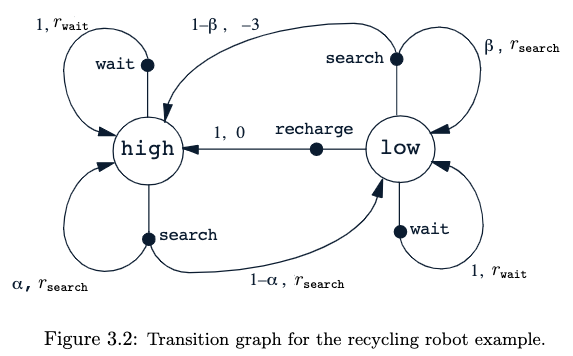

In [299]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

alpha = .8
beta = .7
r_wait = 0.5
r_search = 2.0

# We define a discrete environment with the corresponding transitions
def gen_ambient(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_search):
    P = {}

    P[0] = {}
    P[1] = {}

    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)

env = gen_ambient()

# Implement the random strategy for 20 steps

Define a random action and see what reward it produces


In [106]:
env.reset()
for _ in range(20):
    env.step(env.action_space.sample()) # take a random action
env.close()

memory_reward = []
for i_episode in range(20):
    observation = env.reset()
    #print('Observation :', observation)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print('Reward :', reward)
    memory_reward.append(reward)
print('Total Reward after 20 random steps :', sum(memory_reward))
env.close()

Reward : 0.5
Reward : 2.0
Reward : 0.0
Reward : 0.0
Reward : 2.0
Reward : 0.0
Reward : 0.0
Reward : 2.0
Reward : 0.5
Reward : 0.0
Reward : 2.0
Reward : 0.5
Reward : -3.0
Reward : 0.5
Reward : 0.5
Reward : 2.0
Reward : 2.0
Reward : 0.0
Reward : 0.5
Reward : 0.5
Total Reward after 20 random steps : 12.5


In [107]:
cumul_reward = [sum(memory_reward[:i]) for i in range(len(memory_reward))]

Text(0.5, 0, 'steps')

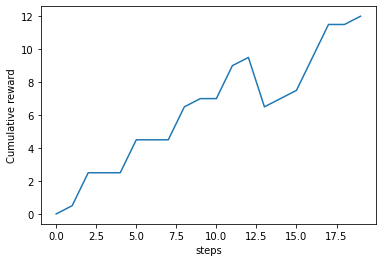

In [108]:
plt.plot(range(0, 20), cumul_reward)
plt.ylabel('Cumulative reward')
plt.xlabel('steps')

# Compute directly the optimal value function for each state


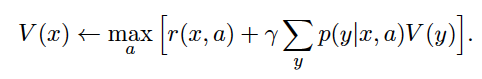

In [162]:
#          s'=0     s'=1
#
# s=0     p(0|0)   p(0|1)
# s=1     p(0|1)   p(1|1)

# p(0|0) = p(0|0,wait)*p(wait|0) + p(0|0,search)*p(search|0) = 1*p(wait|0) + alpha*p(search|0)
# p(1|0) = p(1|0,search)*p(search|0)                         = (1-alpha)*p(search|0)
# p(1|1) = p(1|1,wait)*p(wait|1) + p(1|1,search)*p(search|1) = 1*p(wait|0) + beta*p(search|1)
# p(0|1) = p(0|1,search)*p(search|1) + 1*p(recharge|1)       = (1-beta)*p(search|0) + p(recharge|1)

$h$ = 'high', $l$ = 'low' and $r(s,a,s')$ = reward of the action taken from s and leading to s'

$V^∗(h) = \max_a\left\{r(h,a,h)+\gamma [p(h|h,a)V^*(h) + p(l|h,a)V^*(l)]\right\}$

$V^∗(h)= \max\left\{\begin{aligned}
                        &r(h,search,h)+\gamma [p(h|h,search)V^*(h) + p(l|h,search)V^*(l)],\\
                        &r(h,wait,h)+\gamma [p(h|h,wait)V^*(h) + p(l|h,wait)V^*(l)]\\
                     \end{aligned}\right\}$

$V^∗(h) = \max\left\{\begin{aligned}
                        &p(h|h,search)[r(h,search,h) + \gamma V^∗(h)] + p(l|h,search)[r(h,search,l) + \gamma V^∗(l)],\\
                        &p(h|h,wait)[r(h,wait,h) + \gamma V^∗(h)] + p(l|h,wait)[r(h,wait,l) + \gamma V^∗(l)]\\
                     \end{aligned}\right\}$

$V^∗(h) = \max\left\{\begin{aligned}
                        &\alpha[r_{search}+ \gamma V^∗(h)] + (l−\alpha)[r_{search} + \gamma V^∗(l)],\\
                        &l[r_{wait}+\gamma V^∗(h)] + h[r_{wait}+\gamma V^∗(l)]\\
                     \end{aligned}\right\}$

$V^∗(h) = \max\left\{\begin{aligned}
                      &r_{search}+\gamma [\alpha V^∗(h) + (l−\alpha)V^∗(l)],\\
                      &r_{wait}+\gamma V^∗(h)\\
                    \end{aligned}\right\}$
\
$V^∗(l) = \max\left\{\begin{aligned}
                      &\beta r_{search}−3(l−\beta) +\gamma[(l−\beta)V^∗(h) +\beta V^∗(l)],\\
                      &r_{wait}+\gamma V^∗(l),\\
                      &\gamma V^∗(l)\\
                     \end{aligned}\right\}$

# Implement Value Iteration

  Evaluate the optimal value function given a full description of the environment dynamics
  
  

```
 Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
  
  Returns:
        Vector of length env.nS representing the value function.
```


  
   

In [379]:
def evaluate_Val_func(env, theta=0.01, discount_factor=0.8):
    
    V = np.ones(env.nS) #initiate V[h]=V[l]=1
    deltaV = np.ones(env.nS) #initiate to 1 the delta between values of V from two concecutive iterations
    
    cpt=0
    while np.any(deltaV) > theta or cpt > 1000: #stop when all values of V have converged
        newV = np.empty(env.nS)
        
        for s in range(env.nS):
            
            maxi = -np.inf
            for a in range(env.nA): #loop on all actions possible
                try:
                    proba_path = [t[0] for t in env.P[s][a] if t[1]==s][0] #get the probability of ending up in state s through action a 
                    reward_value = [t[2] for t in env.P[s][a] if t[1]==s][0] #get the reward associated
                    reward = proba_path * reward_value
                except:
                    reward = 0
                
                somme = 0
                for s_prime in range(env.nS):
                    try:
                        proba_path = [t[0] for t in env.P[s][a] if t[1]==s_prime][0]
                    except:
                        proba_path = 0
                    somme += proba_path*V[s_prime]
                    
                tot = reward + discount_factor*somme
                maxi = max(maxi, tot)
                
            newV[s] = maxi
            
        deltaV = np.abs(newV - V)
            
        V = newV
        cpt+=1
        
            
    return V
    

In [380]:
evaluate_Val_func(env, theta=0.0001, discount_factor=0.8)

array([7.73333333, 7.4       ])

# Implement policy iteration

First a policy evluation

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Then a policy improvement:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





$$V^k = (I − \gamma P^k)^{−1}r$$

In [381]:
def policy_eval_fn(policy, envir, theta, discount_factor, approximation_method = False):
    
    # Compute both the reward vector r_pi and
    # transition matrix P_pi associated to the policy on the given envir
    r_pi = np.zeros((envir.nS))
    P_pi = np.zeros((envir.nS, envir.nS))
    for state in range(envir.nS):
        transitions_info = envir.P[state][policy[state]]
        for transition in transitions_info:
            proba = transition[0]
            next_state = transition[1]
            reward = transition[2]
            P_pi[state,next_state] += proba
            r_pi[state] += reward*proba
    
    # Aprroximation method
    if approximation_method:
        # Compute the value function V_pi of the policy pi
        V_pi = np.zeros((envir.nS))
        V_pi_old = np.zeros((envir.nS))
        delta_linf = np.zeros((1000))
        stop = False
        i = 0
        while (not stop) and (i < 1000):
            V_pi = r_pi + discount_factor * (P_pi @ V_pi_old)
            delta_linf[i] = np.max(np.abs(V_pi-V_pi_old))
            V_pi_old[:] = V_pi
            if delta_linf[i]<theta:
                stop = True
                delta_linf = delta_linf[:i+1]
            i+=1
    
    # Direct method for simple environment : compute Vk = (I-Pk)^(-1).r
    else:
        # Compute the value function of the policy pi
        Id = np.eye(envir.nS)
        V_pi = np.linalg.inv(Id - discount_factor*P_pi) @ r_pi
    
    return V_pi

In [397]:
def policy_improvement(envir, policy_eval_fn, discount_factor):
    """ # Probaliblistic Policy
    policy = np.random.rand(envir.nS, envir.nA) #initiate a random policy matrix
    policy = np.array([policy[i][j]/sum(policy[i]) for i in range(policy.shape[0]) for j in range(policy.shape[1])]).reshape(envir.nS, envir.nA) #normalize to have sum of each row equal to 1
    """
    theta = 1e-4
    V_opt = evaluate_Val_func(envir, theta, discount_factor)
    
    pi = np.zeros((envir.nS))
    pi_old = np.zeros((envir.nS))
    V_pi = np.zeros((envir.nS))
    stop = False
    i = 0
    while (not stop) and (i < 50):
        pi_old = np.copy(pi)
        V_pi_old = np.copy(V_pi)
        
        # ----------------------------
        # policy evaluation
        # ----------------------------
        V_pi = policy_eval_fn(pi, envir, theta, discount_factor)
        
        # ----------------------------
        # policy improvement (greedy)
        # ----------------------------
        # Compute state-value function associated to V
        Q = np.zeros((envir.nS, envir.nA))
        for state in range(envir.nS):
            for action in range(envir.nA):
                transitions_info = envir.P[state][action]
                for transition in transitions_info:
                    proba  = transition[0]
                    next_state = transition[1]
                    reward  = transition[2]
                    Q[state, action] += proba*(reward + discount_factor*V_pi[next_state])
        # Compute the/a greedy policy with respect to the Q/V value function
        pi = np.argmax(Q, axis=1)
        
        # ------------------------------------
        # Iteration while the value function isn't close enough from the optimal value policy
        # ------------------------------------
        i += 1
        stop = np.max(np.abs(V_pi - V_opt)) < theta
        
    pi_matrix = np.zeros((envir.nS, envir.nA))
    for state in range(envir.nS):
        action = pi[state]
        pi_matrix[state][action] = 1
    
    print(f'(nb loops for cvg: {i})')
    
    return pi_matrix, V_pi
    

# Using the 3 algorithms do the following experiments


In [398]:
exp1 = gen_ambient(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = gen_ambient(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = gen_ambient(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)
exp_list = [exp1, exp2, exp3, exp4, exp5]

### Compute opt Value function of the environements

In [399]:
for i in range(len(exp_list)):
    print(f"\nThe optimal value function of each state of exp n°{i+1} is :{evaluate_Val_func(exp_list[i], theta=0.0001, discount_factor=0.8)}")


The optimal value function of each state of exp n°1 is :[13.5 13.5]

The optimal value function of each state of exp n°2 is :[11.11111111 10.        ]

The optimal value function of each state of exp n°3 is :[10. 10.]

The optimal value function of each state of exp n°4 is :[4.5 4.5]

The optimal value function of each state of exp n°5 is :[4.3 3.8]


### Compute best policies

In [400]:
# best (policy, V_pi) for each environnement
best_pi = []
for exp in exp_list:
    best_pi.append(policy_improvement(exp, policy_eval_fn, 0.8))

(nb loops for cvg: 50)
(nb loops for cvg: 50)
(nb loops for cvg: 1)
(nb loops for cvg: 1)
(nb loops for cvg: 50)


In [401]:
for i in range(len(best_pi)):
    print(f"\nThe best policy of exp n°{i+1} is :")
    print(best_pi[i][0])
    print(f'with a Value function of :{best_pi[i][1]}')


The best policy of exp n°1 is :
[[0. 1. 0.]
 [0. 1. 0.]]
with a Value function of :[14.33333333 12.66666667]

The best policy of exp n°2 is :
[[0. 1. 0.]
 [0. 0. 1.]]
with a Value function of :[12.93103448 10.34482759]

The best policy of exp n°3 is :
[[0. 1. 0.]
 [1. 0. 0.]]
with a Value function of :[10. 10.]

The best policy of exp n°4 is :
[[0. 1. 0.]
 [1. 0. 0.]]
with a Value function of :[4.5 4.5]

The best policy of exp n°5 is :
[[0. 1. 0.]
 [0. 0. 1.]]
with a Value function of :[4.62962963 3.7037037 ]


**--> Because of the simplicity of the environnement the optimal policy is found in 1 iteration. When the optimal policy doesn't allow to reach the theoretical optimal value function of each state the algorithme stops after 50 iterations.**

# Compare the different strategies with the random one

In [347]:
def cumul_reward_history(nb_steps, env_id, env_list, list_best_pi, random_pi = False):
    
    environment = env_list[env_id]
    env_policy = list_best_pi[env_id][0]
    memory_reward = []
    observation = environment.reset()
    
    for i in range(nb_steps):
        if random_pi: 
            action = environment.action_space.sample()
        else: 
            action = np.argmax(env_policy[observation]) # take the policy action
        observation, reward, done, info = environment.step(action)
        memory_reward.append(reward)
        
    environment.close()

    cumul_reward = [sum(memory_reward[:i]) for i in range(len(memory_reward))]
    
    return cumul_reward

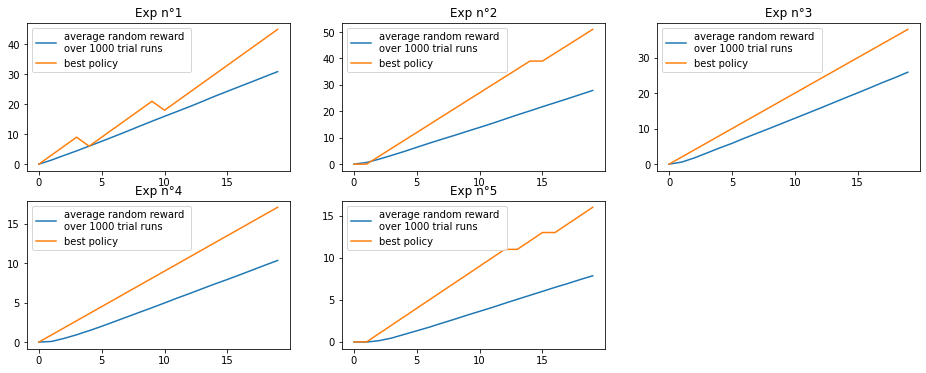

In [348]:
plt.figure(figsize=(16, 6))
NSTEPS = 20
for e in range(len(exp_list)):
    exp_best_pi = cumul_reward_history(NSTEPS, e, exp_list, best_pi)

    exp_random = np.zeros(NSTEPS)
    for i in range(1000):
        exp_random += np.array(cumul_reward_history(NSTEPS, e, exp_list, best_pi, random_pi = True))
    exp_random = exp_random/1000
    
    
    plt.subplot(2,len(exp_list)//2+1,e+1)
    plt.plot(exp_random, label ='average random reward \nover 1000 trial runs')
    plt.plot(exp_best_pi, label ='best policy')
    plt.title('Exp n°'+str(e+1))
    plt.legend()
plt.show()

# Compare the different strategies in terms of speed of convergence for the different scenarios

What strategies ?

# What would you do if alpha and beta are unknown (and you dont know RL)? Try to implement something if you have time.

If I didn't known anything about RL (shame on me) and alpha and beta were unknown, I would probably do some **genetic algorithm**. I would set the number of steps to ~100 and run a batch of random-policy trials as a generation. While running I keep the memory of the actions choosen at each stage. The next generation would merge the best instances of the previous generation to progressivly learn the best long-term policy. The policies would be evaluated based on the cumulated reward reached after 100 steps.